## Cosine Similarity Calculations
Cosine similarity is a measure of similarity between two non-zero vectors of an inner product space that measures the cosine of the angle between them. Similarity measures have a multiude of uses in machine learning projects; they come in handy when matching strings, measuring distance, and extracting features. This similarity measurement is particularly concerned with orientation, rather than magnitude. 
In this case study, you'll use the cosine similarity to compare both a numeric data within a plane and a text dataset for string matching.

Load the Python modules, including cosine_similarity, from sklearn.metrics.pairwise

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline
plt.style.use('ggplot')
from scipy import spatial
from sklearn.metrics.pairwise import cosine_similarity

**<font color='teal'> Load the distance dataset into a dataframe. </font>**

In [24]:
df = pd.read_csv("distance_dataset (1).csv")
df.drop(columns='Unnamed: 0',inplace=True)
df.head()

,X,Y,Z,ClusterID
0,5.135779,4.167542,5.787635,4
1,4.280721,5.770909,6.091044,4
2,8.329098,7.540436,3.247239,2
3,5.470224,5.069249,5.768313,4
4,2.381797,2.402374,3.879101,1


### Cosine Similarity with clusters and numeric matrices

All points in our dataset can be thought of as feature vectors. We illustrate it here as we display the __Cosine Similarity__ between each feature vector in the YZ plane and the [5, 5] vector we chose as reference. The sklearn.metrics.pairwise module provides an efficient way to compute the __cosine_similarity__ for large arrays from which we can compute the similarity.

 **<font color='teal'> First, create a 2D and a 3D matrix from the dataframe. The 2D matrix should contain the 'Y' and 'Z' columns and the 3D matrix should contain the 'X','Y', and 'Z' columns.</font>**

In [15]:
mat_2d = df[['Y','Z']]
mat_3d = df[['X','Y','Z']]

Calculate the cosine similarity for those matrices with reference planes of 5,5 and 5,5,5. Then subtract those measures from 1 in new features.

In [17]:
simCosine3D = 1. - cosine_similarity(mat_3d, [[5,5,5]], 'cosine')
simCosine = 1. - cosine_similarity(mat_2d, [[5,5]], 'cosine')

In [30]:
simCosine.shape,simCosine3D.shape

((2000, 1), (2000, 1))

Using the 2D matrix and the reference plane of (5,5) we can use a scatter plot to view the way the similarity is calculated using the Cosine angle.

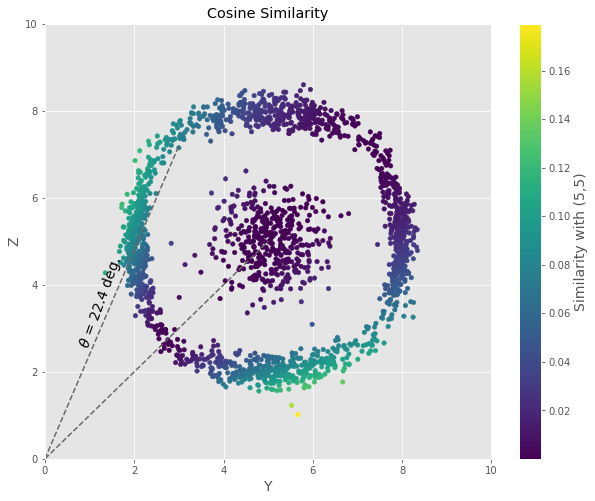

In [31]:
figCosine = plt.figure(figsize=[10,8])

plt.scatter(mat_2d.Y, mat_2d.Z, c=simCosine[:,0], s=20)
plt.plot([0,5],[0,5], '--', color='dimgray')
plt.plot([0,3],[0,7.2], '--', color='dimgray')
plt.text(0.7,2.6,r'$\theta$ = 22.4 deg.', rotation=70, size=14)
plt.ylim([0,10])
plt.xlim([0,10])
plt.xlabel('Y', size=14)
plt.ylabel('Z', size=14)
plt.title('Cosine Similarity')
cb = plt.colorbar()
cb.set_label('Similarity with (5,5)', size=14)

#figCosine.savefig('similarity-cosine.png')

Now, plot the 3D matrix with the similarity and the reference plane, (5,5,5).

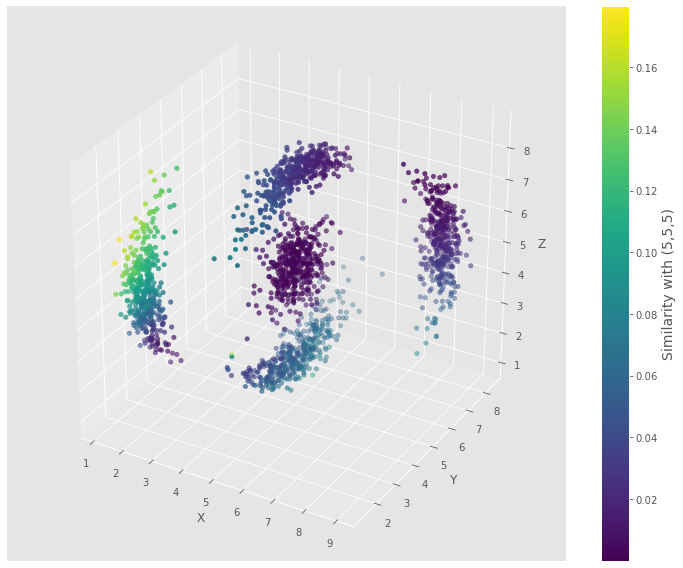

In [32]:
from mpl_toolkits.mplot3d import Axes3D
figCosine3D = plt.figure(figsize=(10, 8))
ax = figCosine3D.add_subplot(111, projection='3d')

p = ax.scatter(mat_3d.X,mat_3d.Y,mat_3d.Z, c=simCosine3D[:,0])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
cb = figCosine3D.colorbar(p)
cb.set_label('Similarity with (5,5,5)', size=14)
                                   
figCosine3D.tight_layout()
#figCosine3D.savefig('cosine-3D.png', dpi=300, transparent=True)

----

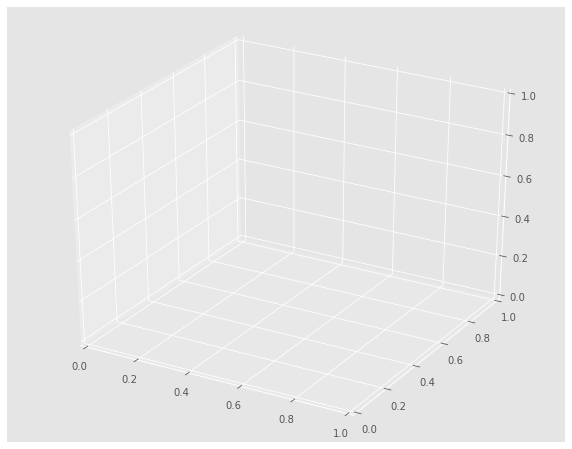

In [22]:
fig = plt.figure(figsize=(10,8))
ax= fig.add_subplot(111,projection='3d')
plt.show()

### Cosine Similarity with text data
This is a quick example of how you can use Cosine Similarity to compare different text values or names for record matching or other natural language proecessing needs. 
First, we use __TfidVectorizer__ to create a vector for each unique word in our Document 0 and Document 1. 

In [34]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
Document1 = "Starbucks Coffee"
Document2 = "Essence of Coffee"

corpus = [Document1,Document2]

X_train_counts = count_vect.fit_transform(corpus)

pd.DataFrame(X_train_counts.toarray(),columns=count_vect.get_feature_names(),index=['Document 0','Document 1'])

,coffee,essence,of,starbucks
Document 0,1,0,0,1
Document 1,1,1,1,0


Now, we use a common frequency tool called TF-IDF to convert the vectors to unique measures.

In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
trsfm=vectorizer.fit_transform(corpus)
pd.DataFrame(trsfm.toarray(),columns=vectorizer.get_feature_names(),index=['Document 0','Document 1'])

,coffee,essence,of,starbucks
Document 0,0.579739,0.000000,0.000000,0.814802
Document 1,0.449436,0.631667,0.631667,0.000000


In [46]:
trsfm

<2x4 sparse matrix of type '<class 'numpy.float64'>'
	with 5 stored elements in Compressed Sparse Row format>

Here, we finally apply the __Cosine Similarity__ measure to calculate how similar Document 0 is compared to any other document in the corpus. Therefore, the first value of 1 is showing that the Document 0 is 100% similar to Document 0 and 0.26055576 is the similarity measure between Document 0 and Document 1.

In [36]:
cosine_similarity(trsfm[0:1], trsfm)

array([[1.        , 0.26055567]])

Replace the current values for `Document 0` and `Document 1` with your own sentence or paragraph and apply the same steps as we did in the above example.

### Let's take story lines of 2 movies in which one of them is remake of other. I'm considering movie "Drishyam" in Malayalam and Telugu. Let's take their plots as documents and search for similarities

 **<font color='teal'> Combine the documents into a corpus.</font>**

In [50]:
doc_0 = "A man named Georgekutty started out as an orphan who had dropped out of school after 4th grade, but is now a businessman running a cable TV service in a rural area. He is married to a woman named Rani and they have two daughters, Anju and Anu. His only interest apart from his family is watching films and he spends most of his time in front of the TV in his small office.During a nature camp, Anju gets photographed in the bathroom by a hidden cell phone belonging to a teenage boy named Varun Prabhakar, who is the spoiled son of police Inspector General Geetha Prabhakar. Varun blackmails Anju to have sex with him or he will send the pictures on social media. When Rani finds out about this and confronts Varun, he retaliates by demanding Rani to have sex with him instead. Enraged by this, Anju attempts to crush Varun's phone with a pipe, but accidentally smacks Varun in the head, killing him instantly. Horrified by what happened, Rani and Anju hide his body in a compost pit, which is witnessed by Anu. Rani narrates the incident to Georgekutty, who starts to devise a plan to save his family from the law. He removes the broken cell phone and disposes of Varun's car, which is seen by the corrupt police constable Sahadevan, who has a grudge against Georgekutty. To ensure things go smooth, Georgekutty takes his family out on a trip to Thodupuzha to pray in a church, watch a movie and eat at a restaurant. Upon seeing that Varun has gone missing, Geetha starts an investigation.After a preliminary investigation, Geetha calls Georgekutty and his family for questioning. Predicting that this would happen, Georgekutty had already taught his family how to change their alibi at the time of murder. When questioned individually, they give the same replies. Georgekutty also presents the bill of the restaurant, the movie tickets and the bus tickets as proof of their alibi. Geetha questions the owners of the establishments they claim they have been to, and their statements prove Georgekutty's alibi. However, Geetha deduces that Georgekutty had probably faked the evidence and established his alibi by actually going on a trip with his family to the same establishments later; some time after the murder, Georgekutty met the owners again, and during those meetings, he had cleverly misdirected them saying they had visited Thodupuzha on a different date.With that in mind, Geetha arrests Georgekutty with his family, and Sahadevan uses brute force to beat the truth out of them. Eventually, Anu gives in after being brutally beaten by Sahadevan and reveals the place where she saw the body buried. However, Geetha and her husband soon learned from Varun's friend Alex about Varun's true intentions for Anju, finally realising that they had raised a perverted teenager who tried to rape a young girl. However, on digging the compost pit, they were shocked to find the carcass of a calf, as Georgekutty, having anticipated their moves, shifted Varun's body elsewhere. With no evidence to prove that Georgekutty and his family had murdered Varun, Georgekutty gets Anu to publicly speak out against Sahadevan and gain public support, resulting Sahadevan to be chased away by a mob and get suspended for battery and assault. All charges against Georgekutty and his family are dropped, and Geetha resigns from her post, presumably out of guilt over Varun's actions.Later on, Geetha and her husband apologises to Georgekutty and his family for their rude and violent behavior, holding themselves responsible for spoiling Varun in the first place and pleading to know what happened to him. A remorseful Georgekutty finally confesses that his family accidentally killed Varun because of what Varun tried to do to Anju, but assured that what happened was nothing personal as they are truly sorry for Varun's death. Now in remand, Georgekutty signs a register at the newly constructed local police station, where the new Inspector states that Georgekutty won't be fooling him and the police and that they will find Varun's body sooner or later. As Georgekutty leaves, a flashback shows him leaving the incomplete police station with a shovel in hand. The earlier dialogue and the flashback both subtly imply that he has hidden Varun's body in the foundations of the police station itself."
doc_1 = "Rambabu is a cable network operator who lives in Rajavaram, a village located in the Araku region, with his wife Jyothi and their daughters – Anju, a twelfth-grade student, and Anu, who is in secondary school. By virtue of his job, Rambabu spends a lot of time watching films in multiple languages. He does so with so much interest that he makes major life decisions by subconsciously taking on the behaviours of characters from these films.During a school trip to a camp, a nude video of Anju is taken on a cell phone camera hidden in the bathroom. The culprit is revealed as Varun, the son of the Inspector-general of police, Geetha. When Varun meets Anju later to blackmail her, she breaks his cell phone and inadvertently kills him. With her mother's help, she hides his body in a compost pit that was originally made for manure. Unknown to them, this is witnessed by Anu. Jyothi tells Rambabu about the incident and he devises a plan to save his family from imprisonment. He gets rid of the broken cell phone. However, as he is disposing of Varun's car, Rambabu is seen by a corrupt police constable named Veerabhadra, who holds a grudge against him. Rambabu then takes his family out on a trip to Vizianagaram, where they attend a religious meeting, watch a movie and dine at a restaurant.Meanwhile, Geetha starts an investigation when she realises that her son has gone missing. After a preliminary investigation, Geetha calls Rambabu and his family in for questioning. Rambabu, predicting that this would happen, coaches his family on how to present their alibi. As a result, when questioned individually, their responses are consistent. They also produce the restaurant receipt, the movie tickets and the tickets of the bus journey as proof of their alibi. The statements of the people who own the establishments that the family visited in Vizianagaram further solidify Rambabu's alibi. However, after a thorough investigation, Geetha realises that Rambabu had acquired the tickets and the receipt on the day of the incident, made an acquaintance with the owners, and had only actually taken the trip a day later with his family.Geetha arrests Rambabu and his family, and Veerabhadra uses force to beat the truth out of them. As Rambabu, Jyothi and Anju are severely injured, Geetha's husband, Prabhakar, asks her to put a stop to this. Out of fear, Anu reveals what she saw and Varun's friend describes the transgression at the camp. After digging up the compost pit, the police find the carcass of a pig instead of Varun's body, indicating that Rambabu had already moved it. Jyothi's brother, Rajesh, and her father call the media and Anu complains to them about Veerabhadra's ill-treatment of her family. After Veerabhadra manhandles Rambabu and his relatives, he is beaten by the local people who learn about him from the media. Rambabu's goodwill remains intact and all the locals extend their support to him. Veerabhadra is suspended, the remaining staff transferred, and Geetha resigns from her post as IG.Before leaving for the United States, Geetha and Prabhakar meet Rambabu to apologise for their deeds, and express their hope that Varun will return some day. But Rambabu indirectly tells them that he killed Varun to save his family and asks them to forgive him.The film comes to an end with Rambabu signing a register at the newly constructed Rajavaram police station. As he leaves, a flashback shows him during the construction of the station with a shovel in hand, indicating that Varun's body is hidden in the building's foundation."
corpus= [doc_0,doc_1]

 **<font color='teal'> Apply the count vectorizer to the corpus to transform it into vectors.</font>**

In [51]:
count_model = CountVectorizer()
count_vectors = count_model.fit_transform(corpus)

 **<font color='teal'> Convert the vector counts to a dataframe with Pandas.</font>**

In [55]:
dialogues_df = pd.DataFrame(count_vectors.toarray(),columns=count_model.get_feature_names(),index=["Drishyam-malayalam","Drushyam-Telugu"])
dialogues_df

,4th,about,accidentally,acquaintance,acquired,actions,actually,after,again,against,...,which,who,wife,will,with,witnessed,woman,won,would,young
Drishyam-malayalam,1,2,2,0,0,1,1,4,1,3,...,2,5,0,2,8,1,1,1,1,1
Drushyam-Telugu,0,3,0,1,1,0,1,4,0,1,...,0,5,1,1,7,1,0,0,1,0


 **<font color='teal'> Apply TF-IDF to convert the vectors to unique frequency measures.</font>**

In [56]:
tfidf_model = TfidfVectorizer()
vectors = tfidf_model.fit_transform(corpus)
df_dialogues = pd.DataFrame(vectors.toarray(),columns=tfidf_model.get_feature_names(),index=["Drishyam-malayalam","Drushyam-Telugu"])
df_dialogues

,4th,about,accidentally,acquaintance,acquired,actions,actually,after,again,against,...,which,who,wife,will,with,witnessed,woman,won,would,young
Marvel,0.01764,0.025103,0.035281,0.000000,0.000000,0.01764,0.012551,0.050205,0.01764,0.037654,...,0.035281,0.062756,0.000000,0.025103,0.100410,0.012551,0.01764,0.01764,0.012551,0.01764
DC,0.00000,0.042689,0.000000,0.019999,0.019999,0.00000,0.014230,0.056918,0.00000,0.014230,...,0.000000,0.071148,0.019999,0.014230,0.099607,0.014230,0.00000,0.00000,0.014230,0.00000


 **<font color='teal'> Use the cosine similarity function to get measures of similarity for the sentences or paragraphs in your original document.</font>**

In [60]:
cosine_similarity(df_dialogues[0:1],df_dialogues)

array([[1.        , 0.74833162]])

### It shows that Telugu Movie is nearly 75% similar in Malayam's movie. It is perfectly expected as that was a remake movie